### Garment Data EDA Process

Data set description:
- date : Date in MM-DD-YYYY
- day : Day of the Week
- quarter :	A portion of the month. A month was divided into four quarters
- department : Associated department with the instance
- team_no : Associated team number with the instance
- no_of_workers	: Number of workers in each team
- no_of_style_change : Number of changes in the style of a particular product
- targeted_productivity	: Targeted productivity set by the Authority for each team for each day.
- smv : Standard Minute Value, it is the allocated time for a task
- wip :	Work in progress. Includes the number of unfinished items for products
- over_time	: Represents the amount of overtime by each team in minutes
- incentive	: Represents the amount of financial incentive (in BDT / Bangladeshi Taka) that enables or motivates a particular course of action.
- idle_time	: The amount of time when the production was interrupted due to several reasons
- idle_men : The number of workers who were idle due to production interruption
- actual_productivity :	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [94]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math

In [95]:
garment = pd.read_csv('../data/garments_worker_productivity.csv')
garment.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


### 1. Checking the datatypes and NULL value counts

In [96]:
garment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Insights: 
- Team is in integer form. It should be converted into object (categorical variable)
- WIP consists of NULL values
- no_of_workers is in float type. Should be changed into integer

#### 1.2 Data Cleaning

<Axes: >

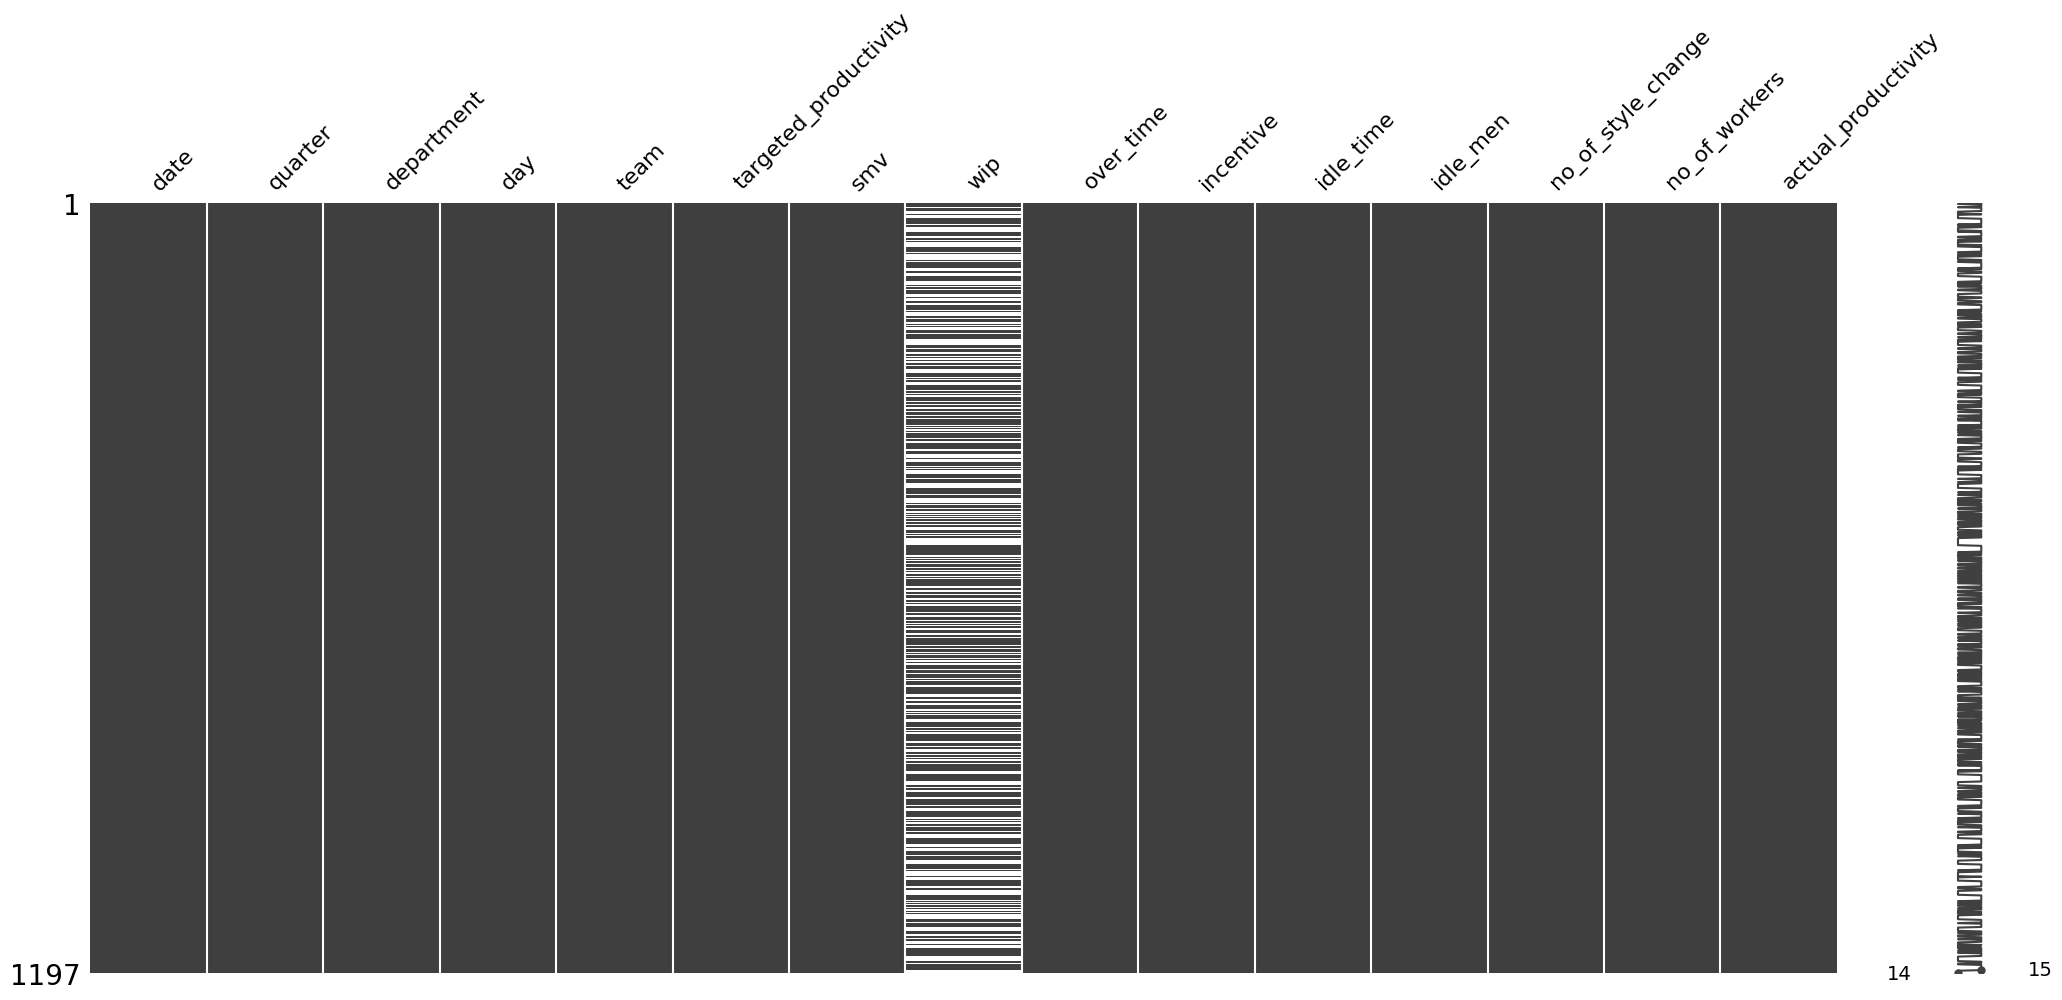

In [97]:
msno.matrix(garment)

In [98]:
garment['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

- The word sweing should be 'sewing'
- The word and the word finishing should end without a space

In [99]:
garment = garment.replace(['finishing '], ['finishing']) 
garment = garment.replace(['sweing'], ['sewing']) 
garment.department.value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

In [100]:
# checking the null values with the department types
print("Number of null values in the sewing department wip: ", garment[garment['department'] == 'sewing'].wip.isnull().sum())
print("Number of null values in the finishing department wip: ", garment[garment['department'] == 'finishing'].wip.isnull().sum())

Number of null values in the sewing department wip:  0
Number of null values in the finishing department wip:  506


In [103]:
garment.wip.mean()

1190.4659913169319

Insight:
- Null values are present due to the type of the department. All the finishing department WIP values set as NaN since there is no work in progress after finishing the product. Instead of NaN we can replace '0' indicating that there are no work in progress products. Other than that there are no null values.

In [104]:
# Replace null values with 0
garment['wip'].fillna(garment.wip.mean(), inplace = True)
garment.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

#### 1.2 Change the data types of Team and no of workers variabels

In [81]:
# round the number of workers 
# This will round up 30.5 to 31

garment['no_of_workers'] = garment['no_of_workers'].apply(lambda x: math.ceil(x))
garment['no_of_workers'] = garment['no_of_workers'].astype(int)

garment['team'] = garment['team'].astype(object)
garment['wip'] = garment['wip'].astype(int)

In [82]:
garment.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190,960,0,0.0,0,0,8,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968,3660,50,0.0,0,0,31,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968,3660,50,0.0,0,0,31,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56,0.800382


In [83]:
garment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   int32  
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   int32  
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [84]:
# define categorical and numerical columns
numerical_features = [feature for feature in garment.columns if garment[feature].dtype != 'O']
categorical_features = [feature for feature in garment.columns if garment[feature].dtype == 'O']

print('we have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('we have {} categorical features: {}'.format(len(categorical_features), categorical_features))

we have 10 numerical features: ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
we have 5 categorical features: ['date', 'quarter', 'department', 'day', 'team']


In [85]:
garment.describe().T

,count,mean,std,min,25%,50%,75%,max
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,1190.269006,1395.647280,7.000000,970.000000,1190.000000,1190.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.668338,22.243885,2.000000,9.000000,34.000000,57.000000,89.000000
actual_productivity,1197.0,0.735091,0.174488,0.233705,0.650307,0.773333,0.850253,1.120437


In [86]:
len(garment[garment['actual_productivity'] >= 1])

37

In [87]:
garment[garment['actual_productivity'] >= 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,Quarter3,finishing,Tuesday,5,0.70,4.15,1190,1440,0,0.0,0,0,8,1.033570
437,1/26/2015,Quarter4,finishing,Monday,3,0.75,3.94,1190,1800,0,0.0,0,0,10,1.059621
456,1/27/2015,Quarter4,sewing,Tuesday,2,0.75,22.52,1635,6840,119,0.0,0,0,57,1.000230
457,1/27/2015,Quarter4,sewing,Tuesday,3,0.75,22.52,1299,6840,119,0.0,0,0,57,1.000230
477,1/28/2015,Quarter4,sewing,Wednesday,2,0.80,22.52,1559,6840,90,0.0,0,0,57,1.000230
478,1/28/2015,Quarter4,sewing,Wednesday,3,0.80,22.52,1350,6840,113,0.0,0,0,57,1.000230
498,1/29/2015,Quarter5,sewing,Thursday,2,0.80,22.52,1416,6840,113,0.0,0,0,57,1.000230
518,1/31/2015,Quarter5,sewing,Saturday,3,0.80,22.52,1136,6960,113,0.0,0,0,58,1.000457
519,1/31/2015,Quarter5,sewing,Saturday,2,0.80,22.52,1397,6840,113,0.0,0,0,57,1.000230
542,2/1/2015,Quarter1,finishing,Sunday,8,0.65,4.15,1190,960,0,0.0,0,0,8,1.011562


In [88]:
# change the values of actucal productivity > 1 as 1
garment['actual_productivity'] = np.where(garment['actual_productivity'] >= 1, 1, garment['actual_productivity'])

In [89]:
# zero count in the numerical features

zero_count = [len(garment[garment['targeted_productivity'] == 0]),
              len(garment[garment['smv'] == 0]),
              len(garment[garment['wip'] == 0]), 
              len(garment[garment['over_time'] == 0]), 
              len(garment[garment['incentive'] == 0]), 
              len(garment[garment['idle_time'] == 0]), 
              len(garment[garment['idle_men'] == 0]), 
              len(garment[garment['no_of_style_change'] == 0]), 
              len(garment[garment['no_of_workers'] == 0]), 
              len(garment[garment['actual_productivity'] == 0])]

zero_count

[0, 0, 0, 31, 604, 1179, 1179, 1050, 0, 0]

In [90]:
# Zeor counts in the numerical variables data frame
dict = {"numerical_feature": numerical_features, "zero_count": zero_count}
zero_count_dataset = pd.DataFrame(dict)
zero_count_dataset


,numerical_feature,zero_count
0,targeted_productivity,0
1,smv,0
2,wip,0
3,over_time,31
4,incentive,604
5,idle_time,1179
6,idle_men,1179
7,no_of_style_change,1050
8,no_of_workers,0
9,actual_productivity,0


In [91]:
# zero count percentage
zero_count_dataset['zero_percentatge'] = zero_count_dataset['zero_count'] / len(garment) * 100
zero_count_dataset

,numerical_feature,zero_count,zero_percentatge
0,targeted_productivity,0,0.000000
1,smv,0,0.000000
2,wip,0,0.000000
3,over_time,31,2.589808
4,incentive,604,50.459482
5,idle_time,1179,98.496241
6,idle_men,1179,98.496241
7,no_of_style_change,1050,87.719298
8,no_of_workers,0,0.000000
9,actual_productivity,0,0.000000


In [92]:
garment[garment['idle_time'] > 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,Quarter1,sewing,Wednesday,5,0.65,30.10,326,5820,0,90.0,10,0,59,0.650835
617,2/4/2015,Quarter1,sewing,Wednesday,4,0.35,30.10,287,6060,23,150.0,15,0,56,0.350706
650,2/7/2015,Quarter1,sewing,Saturday,7,0.70,24.26,658,6960,0,270.0,45,0,58,0.662270
654,2/7/2015,Quarter1,sewing,Saturday,8,0.70,24.26,652,6840,0,300.0,37,0,57,0.365319
775,2/15/2015,Quarter3,sewing,Sunday,8,0.70,30.10,507,5880,40,2.0,10,1,59,0.700573
798,2/16/2015,Quarter3,sewing,Monday,8,0.70,30.10,7,7080,27,2.0,10,2,59,0.621972
818,2/17/2015,Quarter3,sewing,Tuesday,8,0.60,29.40,179,0,23,5.0,30,2,58,0.600983
822,2/17/2015,Quarter3,sewing,Tuesday,10,0.65,18.22,741,0,0,8.0,35,1,49,0.302117
841,2/18/2015,Quarter3,sewing,Wednesday,10,0.70,19.68,1119,5640,0,8.0,35,1,47,0.303574
843,2/18/2015,Quarter3,sewing,Wednesday,8,0.65,29.40,962,4560,0,4.5,30,2,57,0.251399


Insights:
- when the production interrupted due to a reason, the actual_productivity was decreased from a significant amount 
- Since the zero precentages of the idle_time, idle_men and no_of_style_change variables are too high I decided to remove those columns

In [93]:
garment = garment.drop(['date', 'idle_time', 'idle_men', 'no_of_style_change'], axis = 1)

In [105]:
garment.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,1190.465991,1395.647261,7.000000,970.000000,1190.465991,1190.465991,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [106]:
garment[garment['no_of_workers'] > 60]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
355,1/21/2015,Quarter3,sewing,Wednesday,6,0.8,11.61,916.0,5760,75,0.0,0,0,89.0,0.850411


In [107]:
print('mean: ', garment.loc[(garment['department'] == 'sewing') & (garment['team'] == 6)].no_of_workers.mean())
print('mode: ', garment.loc[(garment['department'] == 'sewing') & (garment['team'] == 6)].no_of_workers.mode())

mean:  34.76271186440678
mode:  0    33.0
Name: no_of_workers, dtype: float64


In [24]:
garment.loc[(garment['department'] == 'sewing') & (garment['team'] == 6)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56,0.800382
30,1/3/2015,Quarter1,sewing,Saturday,6,0.80,25.90,1152,6720,50,0.0,0,0,56,0.800125
43,1/4/2015,Quarter1,sewing,Sunday,6,0.80,11.61,539,6975,50,0.0,0,0,31,0.879714
72,1/5/2015,Quarter1,sewing,Monday,6,0.80,11.61,712,7200,50,0.0,0,0,32,0.800246
98,1/6/2015,Quarter1,sewing,Tuesday,6,0.80,11.61,910,4470,38,0.0,0,0,32,0.800077
116,1/7/2015,Quarter1,sewing,Wednesday,6,0.80,11.41,986,5490,50,0.0,0,0,31,0.800344
139,1/8/2015,Quarter2,sewing,Thursday,6,0.80,11.41,411,14640,50,0.0,0,0,31,0.800025
161,1/10/2015,Quarter2,sewing,Saturday,6,0.80,11.41,887,5490,50,0.0,0,0,31,0.800344
180,1/11/2015,Quarter2,sewing,Sunday,6,0.80,11.41,887,5490,50,0.0,0,0,31,0.800344
205,1/12/2015,Quarter2,sewing,Monday,6,0.80,11.41,843,5670,50,0.0,0,0,32,0.800182


In [113]:
## update the 89 value with 33
garment.loc[garment['no_of_workers'] == 89, 'no_of_workers'] = 33

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108,7080,98,0.0,0,0,59,0.940725
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170,1920,50,0.0,0,0,56,0.800382
5,1/1/2015,Quarter1,sewing,Thursday,7,0.80,25.90,984,6720,38,0.0,0,0,56,0.800125
7,1/1/2015,Quarter1,sewing,Thursday,3,0.75,28.08,795,6900,45,0.0,0,0,58,0.753683
8,1/1/2015,Quarter1,sewing,Thursday,2,0.75,19.87,733,6000,34,0.0,0,0,55,0.753098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,3/11/2015,Quarter2,sewing,Wednesday,1,0.75,26.82,1322,7080,45,0.0,0,0,59,0.750051
1187,3/11/2015,Quarter2,sewing,Wednesday,4,0.75,26.82,1054,7080,45,0.0,0,0,59,0.750051
1188,3/11/2015,Quarter2,sewing,Wednesday,5,0.70,26.82,992,6960,30,0.0,0,1,58,0.700557
1189,3/11/2015,Quarter2,sewing,Wednesday,8,0.70,30.48,914,6840,30,0.0,0,1,57,0.700505


In [25]:
garment[garment['targeted_productivity'] > garment['actual_productivity']]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
11,1/1/2015,Quarter1,sewing,Thursday,10,0.75,19.31,578,6480,45,0.0,0,0,54,0.712205
12,1/1/2015,Quarter1,sewing,Thursday,5,0.80,11.41,668,3660,50,0.0,0,0,31,0.707046
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,0,960,0,0.0,0,0,8,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,0,2160,0,0.0,0,0,18,0.593056
16,1/1/2015,Quarter1,finishing,Thursday,7,0.80,2.90,0,960,0,0.0,0,0,8,0.540729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0,960,0,0.0,0,0,8,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0,960,0,0.0,0,0,8,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0,960,0,0.0,0,0,8,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0,1800,0,0.0,0,0,15,0.505889


insights:
- This may cause due to  the small number of workers assigned to the team

In [108]:
garment.insert(4, 'department_team', garment['department'].astype(str) + '_' + garment['team'].astype(str))

In [109]:
garment['department_team'].value_counts()

department_team
sewing_11       59
sewing_12       59
sewing_6        59
sewing_4        59
sewing_5        58
sewing_9        58
sewing_3        58
sewing_10       57
sewing_2        57
sewing_8        56
sewing_1        56
sewing_7        55
finishing_8     53
finishing_2     52
finishing_1     49
finishing_4     46
finishing_9     46
finishing_10    43
finishing_7     41
finishing_12    40
finishing_3     37
finishing_5     35
finishing_6     35
finishing_11    29
Name: count, dtype: int64

In [110]:
garment.head()

,date,quarter,department,day,department_team,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,sewing_8,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,finishing_1,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,sewing_11,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,sewing_12,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,sewing_6,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


C:\Users\User1\AppData\Local\Temp\ipykernel_12780\784081779.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


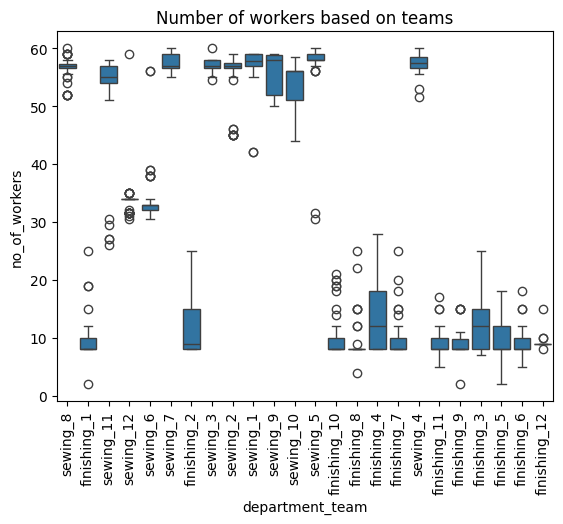

In [114]:
plot = sns.boxplot(x='department_team',y='no_of_workers',data=garment)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.title('Number of workers based on teams')
plt.show()

In [115]:
garment.head()

,date,quarter,department,day,department_team,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,sewing_8,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,finishing_1,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,sewing_11,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,sewing_12,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,sewing_6,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382


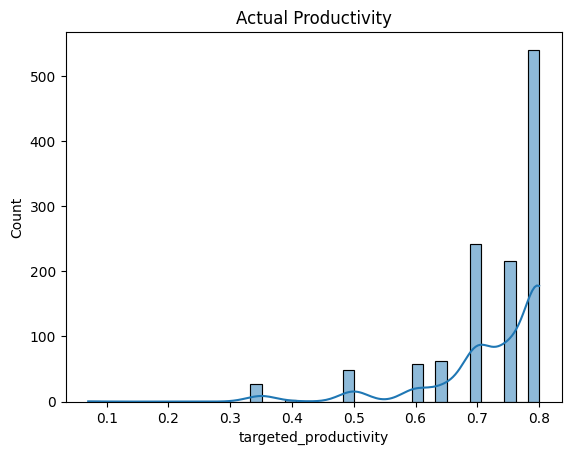

In [116]:
import seaborn as sns
ax = sns.histplot(garment.targeted_productivity, kde=True)
ax.set_title("Actual Productivity")
plt.show()

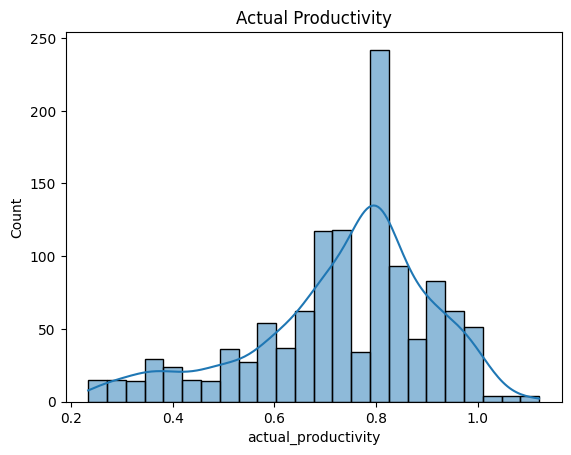

In [117]:
import seaborn as sns
ax = sns.histplot(garment.actual_productivity, kde=True)
ax.set_title("Actual Productivity")
plt.show()

In [118]:
garment[garment['incentive'] != 0]

,date,quarter,department,day,department_team,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,sewing_8,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sewing,Thursday,sewing_11,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,sewing_12,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,sewing_6,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sewing,Thursday,sewing_7,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sewing,Wednesday,sewing_4,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sewing,Wednesday,sewing_5,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sewing,Wednesday,sewing_8,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sewing,Wednesday,sewing_6,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [119]:
garment.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,1190.465991,1395.647261,7.000000,970.000000,1190.465991,1190.465991,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.563074,22.141901,2.000000,9.000000,34.000000,57.000000,60.000000


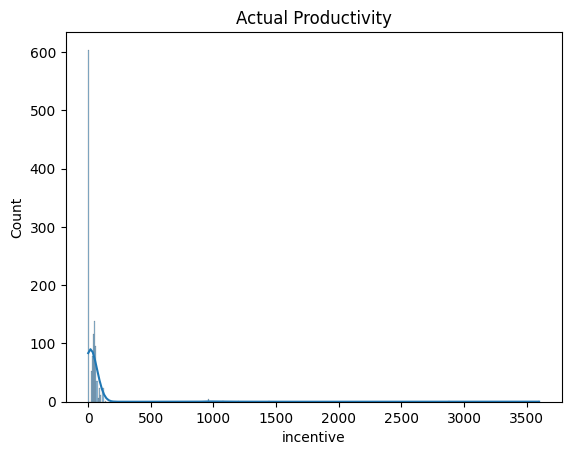

In [120]:
import seaborn as sns
ax = sns.histplot(garment.incentive, kde=True)
ax.set_title("Actual Productivity")
plt.show()

In [121]:
garment[garment['incentive'] > 500]

,date,quarter,department,day,department_team,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1128,3/9/2015,Quarter2,finishing,Monday,finishing_11,11,0.80,2.90,1190.465991,0,960,0.0,0,0,8.0,0.960625
1129,3/9/2015,Quarter2,finishing,Monday,finishing_12,12,0.80,4.60,1190.465991,0,1080,0.0,0,0,9.0,0.902963
1130,3/9/2015,Quarter2,finishing,Monday,finishing_5,5,0.60,3.94,1190.465991,0,2880,0.0,0,0,12.0,0.864343
1133,3/9/2015,Quarter2,finishing,Monday,finishing_9,9,0.75,2.90,1190.465991,0,3600,0.0,0,0,15.0,0.841000
1137,3/9/2015,Quarter2,finishing,Monday,finishing_3,3,0.80,4.60,1190.465991,0,1440,0.0,0,0,12.0,0.795417
1138,3/9/2015,Quarter2,finishing,Monday,finishing_4,4,0.75,3.94,1190.465991,0,960,0.0,0,0,8.0,0.795388
1139,3/9/2015,Quarter2,finishing,Monday,finishing_1,1,0.75,3.94,1190.465991,0,960,0.0,0,0,8.0,0.794567
1143,3/9/2015,Quarter2,finishing,Monday,finishing_2,2,0.70,3.90,1190.465991,0,1200,0.0,0,0,10.0,0.682500
1148,3/9/2015,Quarter2,finishing,Monday,finishing_10,10,0.70,2.90,1190.465991,0,960,0.0,0,0,8.0,0.477292
1149,3/9/2015,Quarter2,finishing,Monday,finishing_8,8,0.65,3.90,1190.465991,0,960,0.0,0,0,8.0,0.264062


## Sample Models try

In [122]:
garment_sample = garment.drop(['date', 'idle_time', 'idle_men', 'no_of_style_change'], axis = 1)

In [123]:
garment_sample.head()

,quarter,department,day,department_team,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
0,Quarter1,sewing,Thursday,sewing_8,8,0.80,26.16,1108.000000,7080,98,59.0,0.940725
1,Quarter1,finishing,Thursday,finishing_1,1,0.75,3.94,1190.465991,960,0,8.0,0.886500
2,Quarter1,sewing,Thursday,sewing_11,11,0.80,11.41,968.000000,3660,50,30.5,0.800570
3,Quarter1,sewing,Thursday,sewing_12,12,0.80,11.41,968.000000,3660,50,30.5,0.800570
4,Quarter1,sewing,Thursday,sewing_6,6,0.80,25.90,1170.000000,1920,50,56.0,0.800382


In [124]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [125]:
X = garment_sample.drop(columns = ['actual_productivity'], axis = 1)
y = garment_sample['actual_productivity']

In [126]:
X

,quarter,department,day,department_team,team,targeted_productivity,smv,wip,over_time,incentive,no_of_workers
0,Quarter1,sewing,Thursday,sewing_8,8,0.80,26.16,1108.000000,7080,98,59.0
1,Quarter1,finishing,Thursday,finishing_1,1,0.75,3.94,1190.465991,960,0,8.0
2,Quarter1,sewing,Thursday,sewing_11,11,0.80,11.41,968.000000,3660,50,30.5
3,Quarter1,sewing,Thursday,sewing_12,12,0.80,11.41,968.000000,3660,50,30.5
4,Quarter1,sewing,Thursday,sewing_6,6,0.80,25.90,1170.000000,1920,50,56.0
...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,finishing_10,10,0.75,2.90,1190.465991,960,0,8.0
1193,Quarter2,finishing,Wednesday,finishing_8,8,0.70,3.90,1190.465991,960,0,8.0
1194,Quarter2,finishing,Wednesday,finishing_7,7,0.65,3.90,1190.465991,960,0,8.0
1195,Quarter2,finishing,Wednesday,finishing_9,9,0.75,2.90,1190.465991,1800,0,15.0


In [127]:
# create column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_transformer, cat_features), 
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [128]:
X_trans = preprocessor.fit_transform(X)

In [129]:
X_trans.shape

(1197, 44)

In [130]:
pd.DataFrame(print(X_trans))

  (0, 0)	1.0
  (0, 6)	1.0
  (0, 10)	1.0
  (0, 35)	1.0
  (0, 37)	0.45432263525107164
  (0, 38)	0.7191368337605292
  (0, 39)	1.0145521433347027
  (0, 40)	-0.05911268710868339
  (0, 41)	0.7505889183804746
  (0, 42)	0.37341414161365927
  (0, 43)	1.104112039440642
  (1, 0)	1.0
  (1, 5)	1.0
  (1, 10)	1.0
  (1, 13)	1.0
  (1, 37)	-1.5673286450297188
  (1, 38)	0.20815096767282038
  (1, 39)	-1.0167776647819042
  (1, 41)	-1.0776823771579405
  (1, 42)	-0.23864319261577166
  (1, 43)	-1.2001759394911167
  (2, 0)	1.0
  (2, 6)	1.0
  (2, 10)	1.0
  (2, 27)	1.0
  :	:
  (1194, 38)	-0.813820764502596
  (1194, 39)	-1.020434424112447
  (1194, 41)	-1.0776823771579405
  (1194, 42)	-0.23864319261577166
  (1194, 43)	-1.2001759394911167
  (1195, 1)	1.0
  (1195, 5)	1.0
  (1195, 12)	1.0
  (1195, 24)	1.0
  (1195, 37)	0.7431299610054702
  (1195, 38)	0.20815096767282038
  (1195, 39)	-1.1118534073760207
  (1195, 41)	-0.8267431797310992
  (1195, 42)	-0.23864319261577166
  (1195, 43)	-0.8839011188534243
  (1196, 1)	1.0
 

""


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((957, 44), (240, 44))

In [132]:
# evaluation metric after model training
def model_evaluation(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [133]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.1419
- Mean Absolute Error: 0.1010
- R2 Score: 0.3582
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1447
- Mean Absolute Error: 0.1053
- R2 Score: 0.2117


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.1771
- Mean Absolute Error: 0.1381
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1635
- Mean Absolute Error: 0.1274
- R2 Score: -0.0064


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1419
- Mean Absolute Error: 0.1010
- R2 Score: 0.3578
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1450
- Mean Absolute Error: 0.1055
- R2 Score: 0.2085


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1156
- Mean Absolute Error: 0.0796
- R2 Score: 0.5736
----------------------

In [134]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.522452
7,CatBoosting Regressor,0.430993
6,XGBRegressor,0.338633
8,AdaBoost Regressor,0.246659
0,Linear Regression,0.211661
2,Ridge,0.208533
3,K-Neighbors Regressor,0.175906
1,Lasso,-0.006425
4,Decision Tree,-0.046041
